

# Classifying Penguins with Machine Learning

In this project, the goal is to classify penguin species using various classification algorithms. The dataset contains information about penguins from three different species: Adelie, Chinstrap, and Gentoo. The data provides various features of the penguins, which will be used to train and evaluate classification models.



<h2 style="font-weight: bold;">
    Penguins Dataset
</h2>




The dataset consists of 7 columns.

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- bill_length_mm: bill length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin sex

###  Load the `Penguins` dataset  and store it into `penguins` dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the penguins dataset
penguins = pd.read_csv('penguins.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
# show the column names of the penguins data frame
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [3]:
# Get the number of rows and columns 
penguins.shape

(333, 7)

In [4]:
# Display a summary of the penguins dataframe, including column data types, non-null counts, and memory usage.
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


<h1 style="font-weight: bold;">
    Data Visualization 

</h1>




The first step is analyze and understand the characteristics of the penguins dataset.

To do that we will begin creating some plots...


<h3 style="font-weight: bold;">
    Flipper Length Visualization
</h3>


Create a plot showing the distribution of flipper length per specie.


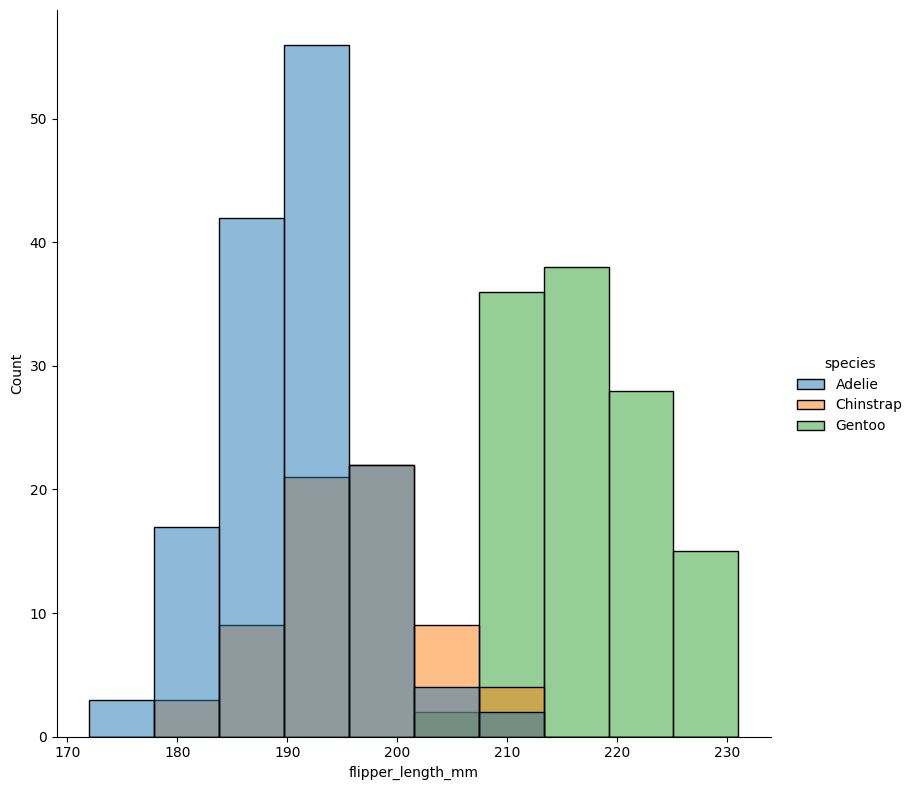

In [5]:
sns.displot(penguins, x='flipper_length_mm', hue='species', kind='hist', height=8);

<h3 style="font-weight: bold;">
    Body Mass Visualization
</h3>

 Create a plot showing the distribution of penguins body mass per specie.


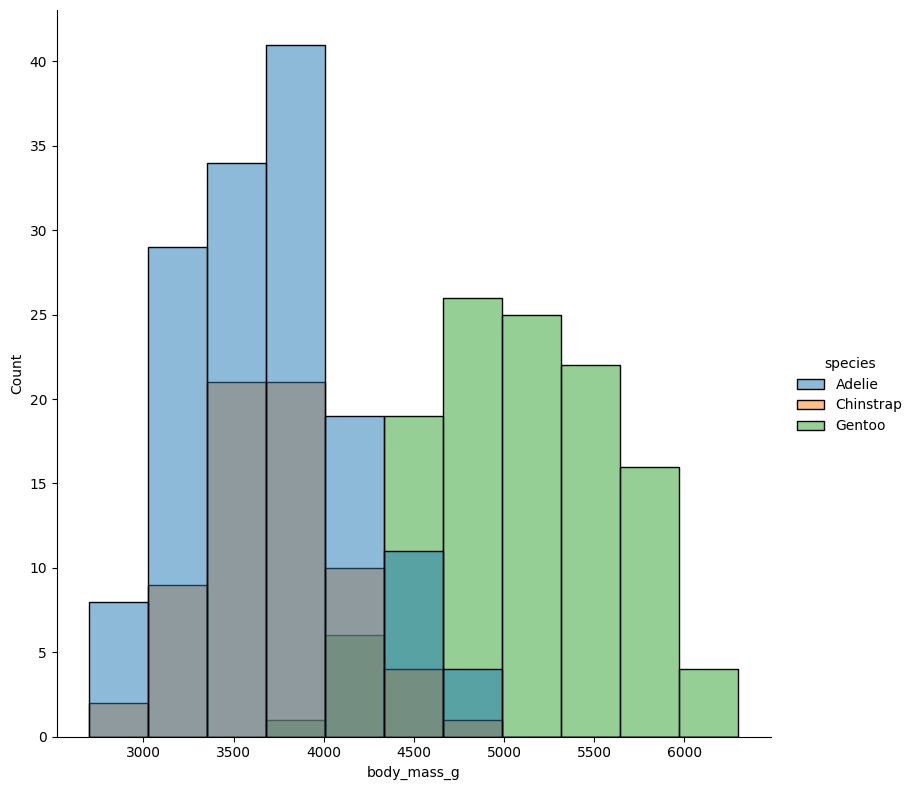

In [6]:
sns.displot(penguins, x='body_mass_g', hue='species', kind='hist', height=8);

<h3 style="font-weight: bold;">
    Bill Length Visualization
</h3>

Go on and create a scatterplot showing the relationships between bill length and bill depth.


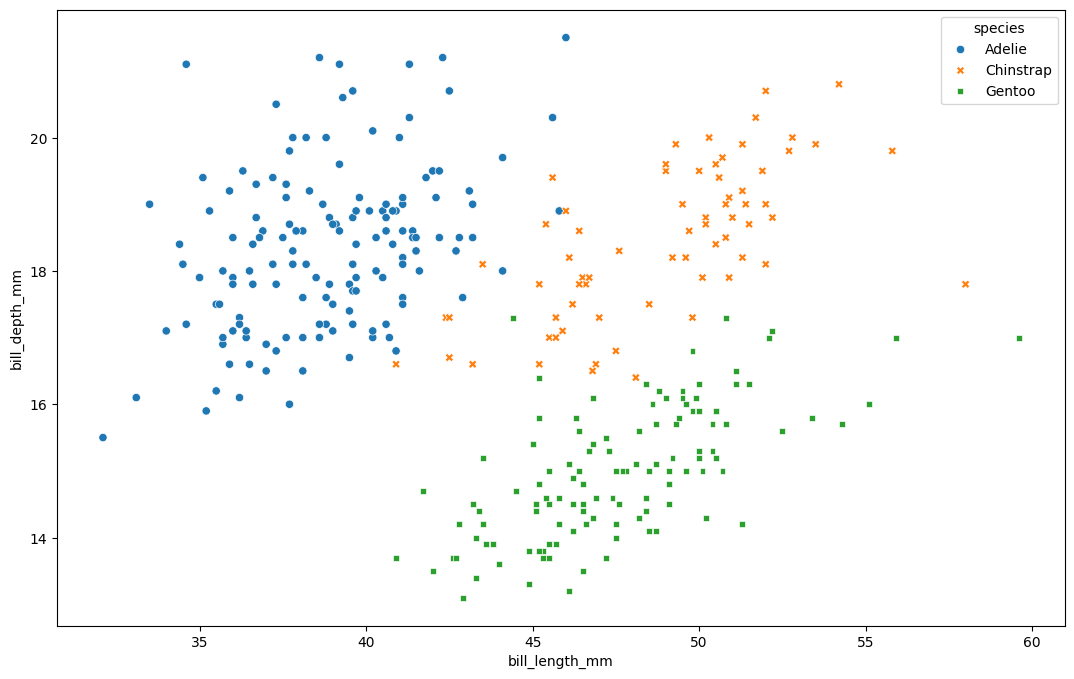

In [7]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.scatterplot(penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species', ax=ax);

<h1 style="font-weight: bold;">
    Data Preparation  

</h1>




Create _X_ features matrix containing penguins characteristics, and _y_ resonse vector containing the expected species.

In [8]:
X = penguins.drop('species', axis=1)
y = penguins['species']

In [9]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
328,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Biscoe,45.2,14.8,212.0,5200.0,Female


In [10]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
328    Gentoo
329    Gentoo
330    Gentoo
331    Gentoo
332    Gentoo
Name: species, Length: 333, dtype: object

Now convert all the categorical features to numerical using one-hot-encoding.

In [11]:
X = pd.get_dummies(X, columns=['island', 'sex']).astype('int')
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39,18,181,3750,0,0,1,0,1
1,39,17,186,3800,0,0,1,1,0
2,40,18,195,3250,0,0,1,1,0
3,36,19,193,3450,0,0,1,1,0
4,39,20,190,3650,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
328,47,13,214,4925,1,0,0,1,0
329,46,14,215,4850,1,0,0,1,0
330,50,15,222,5750,1,0,0,0,1
331,45,14,212,5200,1,0,0,1,0


<h2 style="font-weight: bold;">
    Train Test Split
</h2>

Split data into train and test sets.

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=17)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((233, 9), (100, 9), (233,), (100,))

<h2 style="font-weight: bold;">
    Train Models
</h2>



Now is the time to start building our predicting models, but before that let's import the models:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Initialize the four imported models.

In [15]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()

Now that your models are created lets train them using the train data you have!

In [16]:
import warnings
from sklearn.exceptions import ConvergenceWarning


warnings.filterwarnings('ignore', category=ConvergenceWarning)

models = ['logreg', 'knn', 'svm', 'decision_tree']

for model in models:
    eval(model).fit(X_train, y_train)


<h2 style="font-weight: bold;">
    Evaluate Models
</h2>


Let's evaluate the models and to see which one performs better.

For each model, compute all the evaluation metrics.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame(columns=["logreg", "knn", "svm", "decision_tree"], 
                       index=["accuracy", "precision", "recall", "f1"])

for model in models:
    predictions = eval(model).predict(X_test)
    results.loc['accuracy', model] = accuracy_score(y_test, predictions)
    results.loc['precision', model]= precision_score(y_test, predictions, average='macro', zero_division=0)
    results.loc['recall', model] = recall_score(y_test, predictions,  average='macro')
    results.loc['f1', model] = f1_score(y_test, predictions, average='macro')

<h2 style="font-weight: bold;">
    Results
</h2>




In [18]:
pd.options.display.float_format = "{:.3f}".format
results

,logreg,knn,svm,decision_tree
accuracy,0.980,0.730,0.740,0.940
precision,0.970,0.676,0.510,0.924
recall,0.985,0.686,0.616,0.955
f1,0.976,0.680,0.555,0.934


Which models performs the best?

- We were able to classify different species of penguins with an f1 score of 0.976 using a logistic regression model.

- The second best model was a decision tree, followed by KNN, then SVM.